In [1]:
import torch

from reggae.data_loaders.datasets import P53Data
from reggae.gp.variational import SingleLinearLFM, ExponentialLFM
from reggae.gp.variational.trainer import TranscriptionalTrainer
from reggae.utilities import save, load
from reggae.plot.variational_plotters import Plotter

from matplotlib import pyplot as plt
import numpy as np

f64 = np.float64

(3, 5, 7)
torch.Size([5, 7])


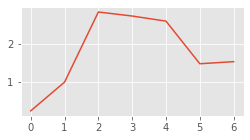

In [9]:
dataset = P53Data()

num_genes = dataset[0][1].shape[1]
num_tfs = 1

t_inducing = torch.linspace(f64(0), f64(1), 5, dtype=torch.float64).reshape((-1, 1))
t_observed = torch.linspace(f64(0), f64(1), 7).view(-1)

m_observed = dataset[0][1].transpose(0, 1)
print(m_observed.shape)
plt.figure(figsize=(4, 2))
plt.plot(dataset[0][1][:, 0])

In [10]:
#ExponentialLFM
model = SingleLinearLFM(num_genes, num_tfs,
                        t_inducing, dataset, extra_points=2,
                        fixed_variance=dataset.variance)
optimizer = torch.optim.Adam(model.parameters(), lr=0.2)
trainer = TranscriptionalTrainer(model, optimizer, dataset)

C:\Users\Jacob\Documents\proj\reggae\reggae\gp\variational\models.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.inducing_inputs = torch.tensor(t_inducing, requires_grad=False)


### Outputs prior to training:

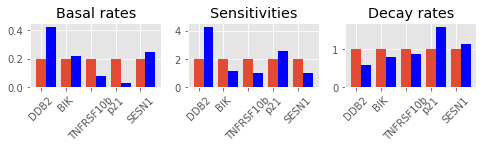

In [14]:
plotter = Plotter(model, dataset.gene_names, t_inducing)
plotter.plot_kinetics()

torch.Size([5, 80])


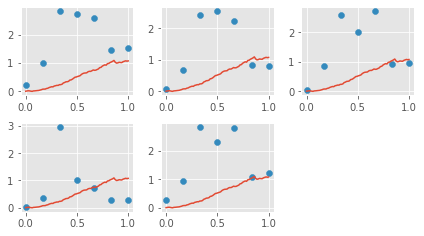

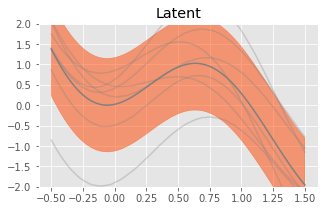

In [15]:
t_predict = torch.linspace(f64(0), f64(1), 80)
rtol = 1e-3
atol = rtol/10

model_kwargs = {
    'rtol': rtol, 'atol': atol,
    'num_samples': 1
}

plotter.plot_outputs(t_predict, t_scatter=t_observed,y_scatter=m_observed, model_kwargs=model_kwargs)
plotter.plot_tfs()

In [13]:
tol = 1e-3
# trainer = Trainer(optimizer)
output = trainer.train(20, rtol=tol, atol=tol/10,
                       report_interval=2, plot_interval=5, num_samples=4)

torch.Size([5, 7]) torch.Size([5, 7])


KeyboardInterrupt: 

<Figure size 288x165.6 with 0 Axes>

### Outputs after training

In [ ]:
tol = 1e-3
plotter = Plotter(model, m_df.index, t_inducing)

# plot_losses(trainer)
plotter.plot_genes(t_predict, t_scatter=t_observed,y_scatter=m_observed, model_kwargs=model_kwargs)
plotter.plot_tfs(ylim=(-2, 5), plot_barenco=True)
plotter.plot_kinetics()
plotter.plot_convergence(trainer)

In [ ]:
save(model, 'variational_linear')

In [ ]:
model = load('variational_linear', SingleLinearLFM, num_genes, num_tfs, t_inducing, t_observed)
optimizer = torch.optim.Adam(model.parameters(), lr=0.2)
trainer = Trainer(model, optimizer, (t_observed, m_observed))